## K Nearest Neighbors

*The nearest neighbors method* (k-Nearest Neighbors, or k-NN) follows the intuition that you look like your neighbors. More formally, the method follows the compactness hypothesis: if the distance between the examples is measured well enough, then similar examples are much more likely to belong to the same class.

![Knn Example](../../../../img/knn1.png)

![Knn Example 2](../../../../img/knn2.png)

### KNN Algorithm

```python
def knn(K):
    for all data points:
        calculate distance to all other points
        select K neighbors
        set t = average of the targets values of neighbors
    return t     
```

$$\Large Predicted = \frac{1}{K} \sum\limits_{x_i \in N} y_i $$

### Code Dictionary
code | description
-----|------------
`.DecisionTreeRegressor` | Regression model with Decision Trees.
`.arrange()` | Generates evenly spaced values within a given interval.
`.reshape()` | Gives a new shape to an array without changing its data.

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline

## Get the Data

Big mart sales prediction form various attribute
Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("Bigmart_sales_Train.csv")
df_test = pd.read_csv("Bigmart_sales_Test.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Impute missing values

In [4]:
print(df.isnull().sum())

#missing values in Item_weight and Outlet_size needs to be imputed
mean = df['Item_Weight'].mean() #imputing item_weight with mean
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() #imputing outlet size with mode
df['Outlet_Size'].fillna(mode[0], inplace =True)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [5]:
#do same for test data
mean = df_test['Item_Weight'].mean()
df_test['Item_Weight'].fillna(mean, inplace =True)

mode = df_test['Outlet_Size'].mode() #imputing outlet size with mode
df_test['Outlet_Size'].fillna(mode[0], inplace =True)

## Remove unecessary columns and deal with Categorical variables

In [6]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [7]:
df_test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df_test = pd.get_dummies(df_test)
df_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.695633,0.118599,234.2300,1985,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.2)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis=1)
y_test = test['Item_Outlet_Sales']

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [10]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.452218,0.000000,0.372789,0.791667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.389699,0.536603,0.541084,0.500000,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.494352,0.521992,0.601465,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.300387,0.000000,0.573605,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.782673,0.050642,0.070576,0.708333,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.481989,0.192594,0.542773,0.916667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.931527,0.342729,0.389190,0.708333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.550461,0.000000,0.986831,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.612980,0.056553,0.661990,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.494352,0.652953,0.340548,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

X_test_scaled = scaler.fit_transform(x_test)
X_test = pd.DataFrame(X_test_scaled)

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
knn = KNeighborsRegressor(n_neighbors=1)

In [15]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [16]:
pred = knn.predict(x_test)

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [19]:
rmse_val = [] #to store rmse values for different k
for K in range(15, 30):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  16 is: 1260.8674428032818
RMSE value for k=  17 is: 1266.206920692017
RMSE value for k=  18 is: 1271.6018322650123
RMSE value for k=  19 is: 1276.8813344608322
RMSE value for k=  20 is: 1285.1621073159786
RMSE value for k=  21 is: 1289.7779991500183
RMSE value for k=  22 is: 1296.214755639788
RMSE value for k=  23 is: 1305.898786713342
RMSE value for k=  24 is: 1309.684945081536
RMSE value for k=  25 is: 1312.208160398106
RMSE value for k=  26 is: 1316.0988975810587
RMSE value for k=  27 is: 1316.3052825949976
RMSE value for k=  28 is: 1316.6933539360869
RMSE value for k=  29 is: 1315.2379526593493
RMSE value for k=  30 is: 1315.5184516466106


Text(0, 0.5, 'Error Rate')

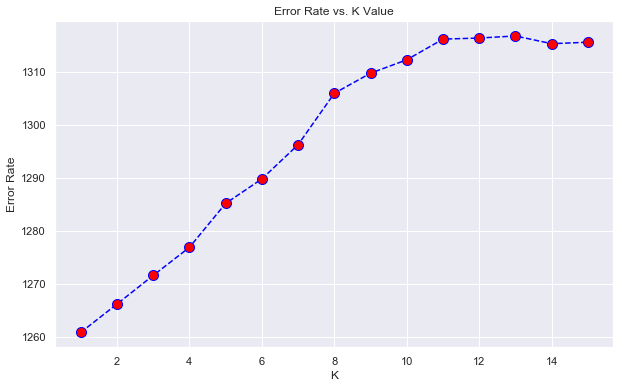

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16),rmse_val,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after around K>8 the error rate just tends to hover around 1200 and 1230.

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
tools.set_credentials_file(username='schiad', api_key='vfPeLH58x07eE7lV9LBK')

In [22]:
def data_to_plotly(x):
    k = []
    
    for i in range(0, len(x)):
        k.append(x[i][0])
        
    return k

In [24]:
data = [[], []]
titles = []
n_neighbors = 7
X = pd.concat([x_train, x_test])
X = X.reset_index(drop=True)
y = pd.concat([y_train, y_test])
y = y.reset_index(drop=True)


for i, weights in enumerate(['uniform', 'distance']):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    yy = knn.fit(X, y)
    y_ = yy.predict(x_test)
    y_t = np.array(y_test.tolist())
    
    if(i==0):
        leg=True
    else:
        leg=False
    
    p1 = go.Scatter(x=list(range(len(x_test)+1)), y=y_t, 
                    mode='markers', showlegend=leg,
                    marker=dict(color='black'),
                    name='data')
    
    p2 = go.Scatter(x=list(range(len(x_test)+1)), y=y_,
                    mode='lines', showlegend=leg,
                    line=dict(color='green'),
                    name='prediction')
    data[i].append(p1)
    data[i].append(p2)
    titles.append("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))


In [25]:
fig = tools.make_subplots(rows=2, cols=1,
                          subplot_titles=tuple(titles), 
                          print_grid=False)

for i in range(0, len(data)):
    for j in range(0, len(data[i])):
        fig.append_trace(data[i][j], i+1, 1)

fig['layout'].update(height=700, hovermode='closest')

for i in map(str, range(1, 3)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, zeroline=False)
    fig['layout'][y].update(showgrid=False, zeroline=False)
                     
py.iplot(fig)